## 9. How to work with strings and date-time in pandas?

We can access string methods with pandas series and DataFrame like we use them with strings. We will learn about the syntax. The similar syntax is used for handling date-time methods. We will learn about that as well.

### 9.1. Using string methods in pandas (String Handling)

For learning string handling in pandas, we will use an online orders dataset from Chipotle restaurant chain. Let’s pretend we want to make the item name uppercase. We will select the series followed by ‘.str’ and then followed by string method we want to use ‘.upper( )’. 

In [1]:
import pandas as pd

In [2]:
orders = pd.read_table("http://bit.ly/chiporders")
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

We can also use string methods for creating conditions to filter rows of the Dataframe. One such string method is ‘.contains( )’. Pretend we want to know which item name has ‘chicken’. We will generate a series of Booleans using the string method and then pass it to ‘loc’ to filter the rows.

In [4]:
orders.item_name.str.contains("Chicken").head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [5]:
orders.loc[orders.item_name.str.contains("Chicken"), :].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


Notice that using string methods with series returns a series, so we can chain multiple string methods together in one line of code. Knowledge of “regular expression” can come handy with some string methods. Observe that the following two lines of code are equivalent, but in the second line, we have also updated the DataFrame column.
 

In [6]:
orders.choice_description.str.replace("[", "").str.replace("]", "").tail()

4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, dtype: object

In [7]:
orders["choice_description"] = orders.choice_description.str.replace("[\[\]]", "")
orders.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...",$11.75
4618,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...",$11.75
4619,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",$11.25
4620,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Lettuce",$8.75
4621,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",$8.75


Another common string method is ‘split( )’. When applied to a series it returns a series of lists where each list contains strings separated by a comma. How a string is split depends upon the separator we used with ‘split( )’, here we have used ‘,’. If we pass ‘expand=True’ as a parameter, we the method will return a DataFrame instead of series.

In [8]:
orders.choice_description.str.split(",").tail()

4617    [Fresh Tomato Salsa,  Rice,  Black Beans,  Sou...
4618    [Fresh Tomato Salsa,  Rice,  Sour Cream,  Chee...
4619    [Fresh Tomato Salsa,  Fajita Vegetables,  Pint...
4620    [Fresh Tomato Salsa,  Fajita Vegetables,  Lett...
4621    [Fresh Tomato Salsa,  Fajita Vegetables,  Pint...
Name: choice_description, dtype: object

In [9]:
orders_choice = orders.choice_description.str.split(",", expand=True)
orders_choice.tail()

,0,1,2,3,4,5,6,7,8,9
4617,Fresh Tomato Salsa,Rice,Black Beans,Sour Cream,Cheese,Lettuce,Guacamole,None,None,None
4618,Fresh Tomato Salsa,Rice,Sour Cream,Cheese,Lettuce,Guacamole,None,None,None,None
4619,Fresh Tomato Salsa,Fajita Vegetables,Pinto Beans,Guacamole,Lettuce,None,None,None,None,None
4620,Fresh Tomato Salsa,Fajita Vegetables,Lettuce,None,None,None,None,None,None,None
4621,Fresh Tomato Salsa,Fajita Vegetables,Pinto Beans,Lettuce,None,None,None,None,None,None


We can also assign the resulting DataFrame to the original DataFrame. We have to create 10 new columns to assign them the DataFrame obtained from ‘split( )’.

In [10]:
orders[["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c10"]] = orders.choice_description.str.split(",", expand=True)
orders.iloc[-5: ,-11: ]

,item_price,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
4617,$11.75,Fresh Tomato Salsa,Rice,Black Beans,Sour Cream,Cheese,Lettuce,Guacamole,None,None,None
4618,$11.75,Fresh Tomato Salsa,Rice,Sour Cream,Cheese,Lettuce,Guacamole,None,None,None,None
4619,$11.25,Fresh Tomato Salsa,Fajita Vegetables,Pinto Beans,Guacamole,Lettuce,None,None,None,None,None
4620,$8.75,Fresh Tomato Salsa,Fajita Vegetables,Lettuce,None,None,None,None,None,None,None
4621,$8.75,Fresh Tomato Salsa,Fajita Vegetables,Pinto Beans,Lettuce,None,None,None,None,None,None


### 9.2. Using date-time methods in pandas (Date-Time Handling)

We will use the UFO sightings report dataset to learn about date-time handling. Each row represents a U.F.O. sighting. If we look at the data types, notice that ‘Time’ is stored as ‘object’ type.

In [11]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [12]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

Say, we want the hour when the U.F.O. the sighting was reported. We can use the string method ‘slice( )’ to obtain the hour, but there is a better way of doing it. We will first change the data type of ‘Time’ column to ‘DateTime’ using the top-level function ‘.to_datetime( )’. We will pass the time series to it and overwrite the series.

In [13]:
ufo.Time.str.slice(-5, -3).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: object

In [14]:
ufo["Time"] = pd.to_datetime(ufo.Time)

In [15]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object


Note that we can also change the data type to ‘DateTime’ while reading the dataset as below.

In [16]:
ufo = pd.read_csv("http://bit.ly/uforeports", parse_dates=["Time"])
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [17]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

Now we can access many date-time handling methods. The format is similar to using string methods, pandas series is followed by ‘.dt’, followed by date-time methods. We can use ‘hour’ to ask for hours, ‘weekday’ to ask for days of the week, ‘dayofyear’ to ask for the days of the year. There are many more date-time attributes we can call on ‘DateTime’ data type.

In [18]:
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [19]:
ufo.Time.dt.weekday.head()

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [20]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

We can use ‘to_datetime( )’ function, to convert a string to ‘DateTime’ format and use it for comparison with ‘DateTime’ datatype. We can pass the series of Booleans to ‘loc’ to filter the rows of DataFrame. We can also perform mathematical operations on date-time series. The difference between ‘max( )’ and ‘min( )’ gives a special ‘Timedelta’ object. We can further use ‘Timedelta’ attributes with it.

In [21]:
ts = pd.to_datetime("11/23/1995")

In [22]:
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
8937,Gaithersberg,RED,FORMATION,MD,1995-11-23 01:00:00
8938,Comanche County,NaN,NaN,OK,1995-11-24 00:00:00
8939,Portland,RED GREEN,DISK,MI,1995-11-24 18:00:00
8940,Wishkah River,GREEN,NaN,WA,1995-11-25 00:42:00
8941,Woodland,NaN,NaN,CA,1995-11-25 20:01:00


In [23]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [24]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [25]:
(ufo.Time.max() - ufo.Time.min()).days

25781

‘sort_index( )’ series method is common with value counts of time series data to plot line graphs based on the order of time. Suppose we want to plot a line graph shows the number of reports in different years. We can add a new column called ‘Year’ which only contains the year of the reported sighting. We can then apply the ‘value_counts( )’ method to count the number of sightings each year, sort the index (year) in ascending order and then plot the line graph.

In [26]:
ufo["Year"] = ufo.Time.dt.year

In [27]:
ufo.Year.value_counts().head()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
Name: Year, dtype: int64

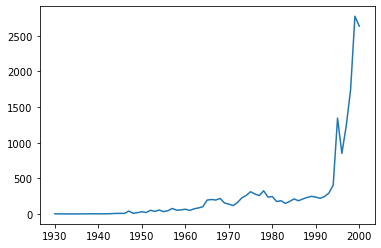

In [28]:
ufo.Year.value_counts().sort_index().plot()

### 9.3. Creating a DateTime column from a DataFrame

We will pass a list of lists to ’pandas.DataFrame( )’, a DataFrame constructor. There are two lists within the list and each has four items, so it will create a DataFrame with 2 rows and 4 columns. We normally pass a series to ‘to_datetime( )’ function, but here we will be passing a DataFrame to it. Pandas will figure out what values in each column mean with the help of column names and return a ‘datetime’ series. If we have several columns but only some of them are related to date and time. We can pass the subset of DataFrame to obtain the ‘datetime’ series. We can also set the series to index of DataFrame if needed.


In [35]:
df = pd.DataFrame([[12, 25, 2017, 10], [1, 15, 2018, 11]], columns=["month", "day", "year", "hour"])
df

,month,day,year,hour
0,12,25,2017,10
1,1,15,2018,11


In [36]:
pd.to_datetime(df)

0   2017-12-25 10:00:00
1   2018-01-15 11:00:00
dtype: datetime64[ns]

In [37]:
pd.to_datetime(df.loc[:, ["month", "day", "year"]])

0   2017-12-25
1   2018-01-15
dtype: datetime64[ns]

In [38]:
df.index = pd.to_datetime(df.loc[:, ["month", "day", "year"]])
df

,month,day,year,hour
2017-12-25,12,25,2017,10
2018-01-15,1,15,2018,11
